### Plotting with Pandas

We have gone through a lot of plotting tools in the past two weeks. Using matplotlib, seaborn and Tableau. Today we are going to practice using pandas own plotting functionality.

Just to give you an idea of how flexible plotting is, here is the function definition with it's parameters

DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline

First, let's try some barplots:

Many sources consider William Playfair (1759-1823) to have invented the bar chart and the Exports and Imports of Scotland to and from different parts for one Year from Christmas 1780 to Christmas 1781 graph from his The Commercial and Political Atlas to be the first bar chart in history.

We will be using the np.random.randn function to generate some data. 
It samples data from a standard normal distribution (mean of 0, std dev of 1) and creates a matrix of lenght x * y.

In [11]:
df_bar = pd.DataFrame(np.random.randn(10, 4), columns=list("abcd"))
df_bar

,a,b,c,d
0,0.216269,-1.512255,-0.944845,-0.402623
1,1.530357,0.645936,1.140700,-0.052264
2,-1.384688,0.906503,0.283510,-0.585227
3,0.616658,0.777590,0.209467,-1.190285
4,1.633211,1.964177,1.380977,-1.430117
5,2.107921,-0.460620,-2.867985,0.138856
6,2.151629,-0.520446,0.761930,-1.401212
7,2.034898,-1.043717,-1.524541,0.050068
8,0.108708,2.132018,-0.390775,1.190196
9,-0.566041,-1.492098,0.547837,-2.051493


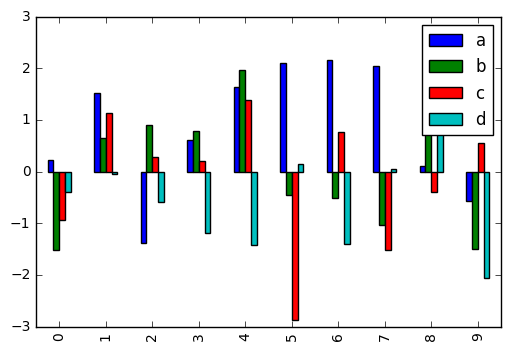

In [17]:
df_bar.plot(kind='bar') #vertical bar chart.

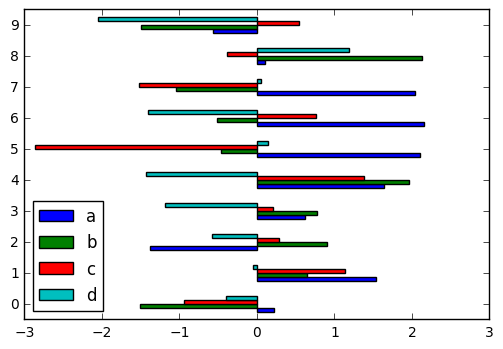

In [18]:
df_bar.plot(kind='barh') #horizontal bar chart.

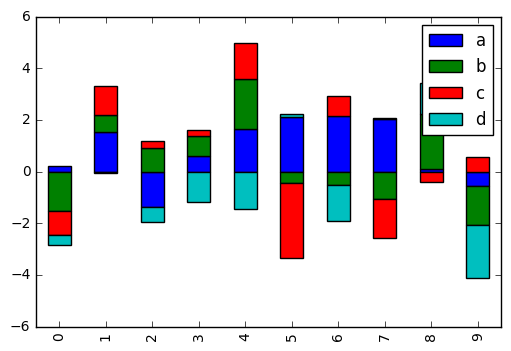

In [21]:
df_bar.plot(kind='bar', stacked=True) #stacked bar chart.

Now we can try **scatter plots**. 

We can define them as: a plot of two vari-ables, x and y, measured independently to produce bivariate pairs (xi, yi), and displayed as in-dividual points on a coordinate grid typically defined by horizontal and vertical axes

It's estimated that between 70 and 80 percent of graphs used in scientific publications are scatterplots.
Their invention also lead to the invention of the concepts of correlation and linear regression.

They are useful because they allow the possibility to discover regularity in empirical data by smoothing and other graphic annotations to enhance visual perception.

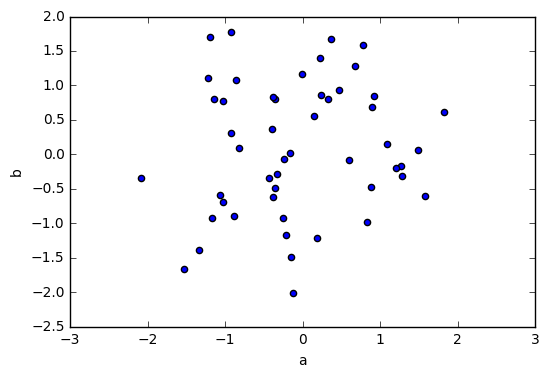

In [28]:
df_scatter = pd.DataFrame(np.random.randn(50, 4), columns=list("abcd"))
df_scatter.plot(kind='scatter', x='a', y='b')

**Note**: See that in the above scatter plot, we are only graphying the first two columns of the data frame.

We can also plot several different datasets in the same scatter plot, and distinguish between them by colour.

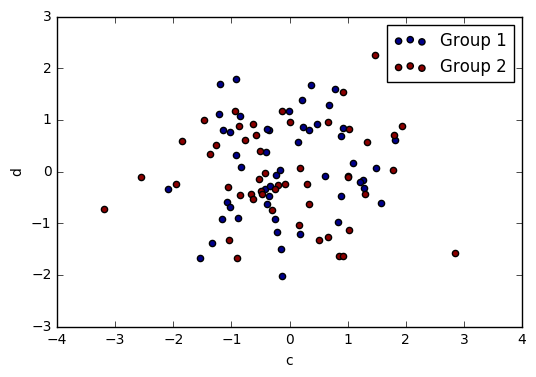

In [42]:
ax = df_scatter.plot(kind='scatter', x='a', y='b', color='DarkBlue', label='Group 1');
df_scatter.plot(kind='scatter', x='c', y='d', color='DarkRed', label='Group 2', ax=ax);

Now we will try using time **series plots**.

They can be used to evaluate the behaviour of data over time.

Time series plots are often used to examine daily, weekly, seasonal or annual variations, or before-and-after effects of a process change.

In [101]:
from datetime import datetime

Lets first create a dataset with dates as one of the dimensions.

In [102]:
time_series_data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994',
'2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071',
'2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592',
'2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109',
'2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'],
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
time_series_df = pd.DataFrame(time_series_data, columns = ['date', 'battle_deaths'])
print df

                         date  battle_deaths
0  2014-05-01 18:47:05.069722             34
1  2014-05-01 18:47:05.119994             25
2  2014-05-02 18:47:05.178768             26
3  2014-05-02 18:47:05.230071             15
4  2014-05-02 18:47:05.230071             15
5  2014-05-02 18:47:05.280592             14
6  2014-05-03 18:47:05.332662             26
7  2014-05-03 18:47:05.385109             25
8  2014-05-04 18:47:05.436523             62
9  2014-05-04 18:47:05.486877             41


If we get time types, we will see that the dates are objects, we need to convert them into date types.

In [103]:
time_series_df.dtypes

date             object
battle_deaths     int64
dtype: object

In [104]:
time_series_df['date'] = pd.to_datetime(time_series_df['date'])
time_series_df.dtypes

date             datetime64[ns]
battle_deaths             int64
dtype: object

Now we also need to convert the index, by setting it to the dates, we can also then drop the date column.

In [105]:
time_series_df.index = time_series_df['date']
del time_series_df['date']
time_series_df

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


We can then use df.plot to plot the time series.

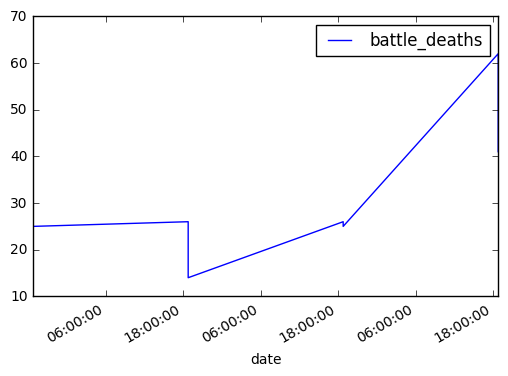

In [106]:
time_series_df.plot()

We can also rotate the labels, using rot

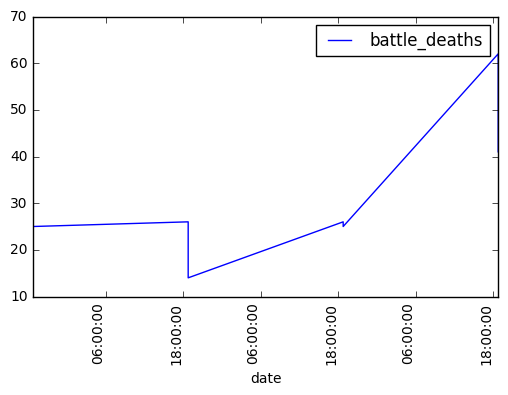

In [108]:
time_series_df.plot(rot=90)

Another option is to re sample the data, into daily buckets and then plot.

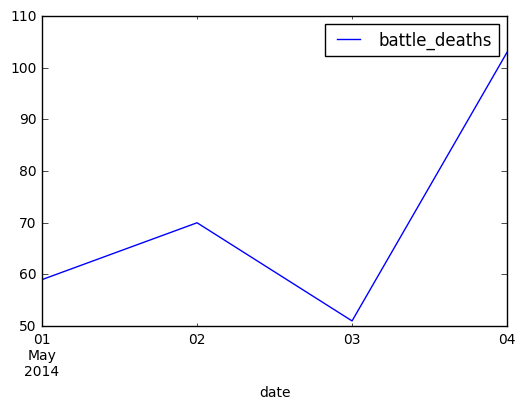

In [112]:
time_series_df.resample('D').sum().plot()